# **Preparazione dataset per le predizioni**

In [1]:
#importo librerie

import pandas as pd
import numpy as np


In [2]:
#Caricamento del dataset.
trainingData = pd.read_csv('./Data/trainingData.csv')
validationData = pd.read_csv('./Data/validationData.csv')

In [3]:
#Drop colonne superflue
trainingData.drop(['SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis=1, inplace=True )
validationData.drop(['SPACEID','RELATIVEPOSITION','USERID','PHONEID','TIMESTAMP'], axis=1, inplace=True )

In [4]:
#creazione attributo BUILDING_FLOOR
trainingData['BUILDING_FLOOR'] = trainingData['BUILDINGID']*10 + trainingData['FLOOR']
validationData['BUILDING_FLOOR'] = validationData['BUILDINGID']*10 + validationData['FLOOR']
trainingData.drop(['FLOOR','BUILDINGID'], axis=1, inplace=True)
validationData.drop(['FLOOR','BUILDINGID'], axis=1, inplace=True)

In [5]:
#Divido in features e targets

X_train = trainingData[[i for i in trainingData.columns if 'WAP' in i]]
y_train = trainingData[[i for i in trainingData.columns if not 'WAP' in i]]

X_test = validationData[[i for i in validationData.columns if 'WAP' in i]]
y_test = validationData[[i for i in validationData.columns if not 'WAP' in i]]

In [6]:
#modifica continuità dati

X_train = X_train.replace(to_replace=100,value=-111)
X_test = X_test.replace(to_replace=100,value=-111)

Effettuando le predizioni di ogni modello per questo target, potremo calcolare:
- **accuracy score**, che ci dice la percentuale di predizioni corrette rispetto alle predizioni totali.
- **f1_score**, che combina precisione e recall del modello, valutando la performance generale. Come average inseriremo *weighted*, impostando di calcolare l'F1-score per ciascuna classe, effettuando la media ponderata in base alla distribuzione delle classi.
- **confusion matrix**, che mostra il numero di predizioni corrette e errate, organizzato per classi reali e predette.

Facendo la predizione, potremo calcolare le seguenti metriche per confrontare le prestazioni del modello di regressione:
- **R2_score**, che mi dice quanto bene il modello spiega la variabilità del dataset
- **mean_squared_error**, calcola la media degli errori della predizione, dando peso agli errori più grandi
- **mean_absolute_error**, che invece calcola la media degli errori indipendentemente dalla gravità di quest'ultimo

# **Caricamento, predizione e calcolo metriche**

##SVM

Carico i modelli

In [7]:
import pickle

file_svm_buildingfloor = open('modelli/svm_buildingfloor.pkl','rb')
svm_buildingfloor = pickle.load(file_svm_buildingfloor)

In [8]:
file_svm_latitude = open('modelli/svm_latitude.pkl','rb')
svm_latitude = pickle.load(file_svm_latitude)

In [9]:
file_svm_longitude = open('modelli/svm_longitude.pkl','rb')
svm_longitude = pickle.load(file_svm_longitude)

Faccio le predizioni

In [10]:
y_pred_buildingfloor_svm = svm_buildingfloor.best_estimator_.predict(X_test)

In [11]:
y_pred_latitude_svm = svm_latitude.best_estimator_.predict(X_test)

In [12]:
y_pred_longitude_svm = svm_longitude.best_estimator_.predict(X_test)

Calcolo le metriche

In [13]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

#accuracy
accuracy_svm = accuracy_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_svm)
print("Accuracy SVM:", accuracy_svm)

#F1-score
f1_svm = f1_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_svm, average='weighted')
print("F1-score SVM:", f1_svm)

#confusion matrix
confusion_matrix_svm = confusion_matrix(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_svm)
print("Confusion Matrix SVM:\n", confusion_matrix_svm)

Accuracy SVM: 0.8820882088208821
F1-score SVM: 0.8832097235992815
Confusion Matrix SVM:
 [[ 70   6   2   0   0   0   0   0   0   0   0   0   0]
 [  6 188  13   0   0   0   0   1   0   0   0   0   0]
 [  1   3 161   0   0   0   0   0   0   0   0   0   0]
 [  0   0  10  75   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  22   2   6   0   0   0   0   0   0]
 [  0   0   2   0   4  98  38   1   0   0   0   0   0]
 [  0   0   3   0   0   1  78   5   0   0   0   0   0]
 [  0   0   5   0   0   0   2  40   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109   2   0   0]
 [  0   0   1   0   0   0   0   0   0   2  47   3   1]
 [  0   0   0   0   0   0   0   0   0   0   0  37   3]
 [  0   0   0   0   0   0   0   1   0   1   0   4  33]]


In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R-squared score
r2_latitude_svm = r2_score(y_test['LATITUDE'], y_pred_latitude_svm)
print("R2 SVM latitude:", r2_latitude_svm)

# Mean squared error (MSE)
mse_latitude_svm = mean_squared_error(y_test['LATITUDE'], y_pred_latitude_svm)
print("MSE SVM latitude:", mse_latitude_svm)

# Mean absolute error (MAE)
mae_latitude_svm = mean_absolute_error(y_test['LATITUDE'], y_pred_latitude_svm)
print("MAE SVM latitude:", mae_latitude_svm)

R2 SVM latitude: 0.9591131131535503
MSE SVM latitude: 201.72859928210502
MAE SVM latitude: 9.210926393789686


In [15]:
# R-squared score
r2_longitude_svm = r2_score(y_test['LONGITUDE'], y_pred_longitude_svm)
print("R-squared SVM longitude:", r2_longitude_svm)

# Mean squared error (MSE)
mse_longitude_svm = mean_squared_error(y_test['LONGITUDE'], y_pred_longitude_svm)
print("MSE SVM longitude:", mse_longitude_svm)

# Mean absolute error (MAE)
mae_longitude_svm = mean_absolute_error(y_test['LONGITUDE'], y_pred_longitude_svm)
print("MAE SVM longitude:", mae_longitude_svm)

R-squared SVM longitude: 0.9595448643943693
MSE SVM longitude: 584.06203452497
MAE SVM longitude: 14.610690442419543


## XGBoost

Effettuo l'encode per BUILDING_FLOOR

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train['BUILDING_FLOOR'])

Carico i modelli

In [17]:
file_xgboost_buildingfloor = open('modelli/xgboost_buildingfloor.pkl','rb')
xgboost_buildingfloor = pickle.load(file_xgboost_buildingfloor)

In [18]:
file_xgboost_latitude = open('modelli/xgboost_latitude.pkl','rb')
xgboost_latitude = pickle.load(file_xgboost_latitude)

In [19]:
file_xgboost_longitude = open('modelli/xgboost_longitude.pkl','rb')
xgboost_longitude = pickle.load(file_xgboost_longitude)

Faccio le predizioni

In [20]:
y_pred_buildingfloor_xgboost_le = xgboost_buildingfloor.best_estimator_.predict(X_test)
#reverse dell'encoding per ritornare alle classi desiderate
y_pred_buildingfloor_xgboost = le.inverse_transform(y_pred_buildingfloor_xgboost_le)

In [21]:
y_pred_latitude_xgboost = xgboost_latitude.best_estimator_.predict(X_test)

In [22]:
y_pred_longitude_xgboost = xgboost_longitude.best_estimator_.predict(X_test)

Calcolo le metriche

In [23]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

#accuracy
accuracy_xgboost = accuracy_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_xgboost)
print("Accuracy XGBoost:", accuracy_xgboost)

#F1-score
f1_xgboost = f1_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_xgboost, average='weighted')
print("F1-score XGBoost:", f1_xgboost)

#confusion matrix
confusion_matrix_xgboost = confusion_matrix(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_xgboost)
print("Confusion Matrix XGBoost:\n", confusion_matrix_xgboost)

Accuracy XGBoost: 0.8910891089108911
F1-score XGBoost: 0.8918780648116473
Confusion Matrix XGBoost:
 [[ 67  10   0   1   0   0   0   0   0   0   0   0   0]
 [  7 197   4   0   0   0   0   0   0   0   0   0   0]
 [  0   7 157   1   0   0   0   0   0   0   0   0   0]
 [  0   0   6  79   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  24   2   4   0   0   0   0   0   0]
 [  0   0   1   0   3 108  30   1   0   0   0   0   0]
 [  0   0   0   0   1   1  78   7   0   0   0   0   0]
 [  0   0   0   0   0   0   5  42   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0 107   3   1   0]
 [  0   0   0   0   0   0   0   0   0   9  40   5   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38   2]
 [  0   0   0   0   0   0   0   0   0   1   0   7  31]]


In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R2
r2_latitude_xgboost = r2_score(y_test['LATITUDE'], y_pred_latitude_xgboost)
print("R2 XGBoost latitude:", r2_latitude_xgboost)

# MSE
mse_latitude_xgboost = mean_squared_error(y_test['LATITUDE'], y_pred_latitude_xgboost)
print("MSE XGBoost latitude:", mse_latitude_xgboost)

# MAE
mae_latitude_xgboost = mean_absolute_error(y_test['LATITUDE'], y_pred_latitude_xgboost)
print("MAE XGBoost latitude:", mae_latitude_xgboost)

R2 XGBoost latitude: 0.9827862028407987
MSE XGBoost latitude: 84.92980163280649
MAE XGBoost latitude: 5.951546919751748


In [25]:
# R2
r2_longitude_xgboost = r2_score(y_test['LONGITUDE'], y_pred_longitude_xgboost)
print("R2 XGBoost longitude:", r2_longitude_xgboost)

# MSE
mse_longitude_xgboost = mean_squared_error(y_test['LONGITUDE'], y_pred_longitude_xgboost)
print("MSE XGBoost longitude:", mse_longitude_xgboost)

# MAE
mae_longitude_xgboost = mean_absolute_error(y_test['LONGITUDE'], y_pred_longitude_xgboost)
print("MAE XGBoost longitude:", mae_longitude_xgboost)

R2 XGBoost longitude: 0.9916916813534506
MSE XGBoost longitude: 119.94950503910754
MAE XGBoost longitude: 6.744770503239168


## KNN

Carico i modelli

In [26]:
file_knn_buildingfloor = open('modelli/knn_buildingfloor.pkl','rb')
knn_buildingfloor = pickle.load(file_knn_buildingfloor)

In [27]:
file_knn_latitude = open('modelli/knn_latitude.pkl','rb')
knn_latitude = pickle.load(file_knn_latitude)

In [28]:
file_knn_longitude = open('modelli/knn_longitude.pkl','rb')
knn_longitude = pickle.load(file_knn_longitude)

Faccio le predizioni

In [29]:
y_pred_buildingfloor_knn = knn_buildingfloor.best_estimator_.predict(X_test)

In [30]:
y_pred_latitude_knn = knn_latitude.best_estimator_.predict(X_test)

In [31]:
y_pred_longitude_knn = knn_longitude.best_estimator_.predict(X_test)

Calcolo le metriche

In [32]:
#accuracy
accuracy_knn = accuracy_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_knn)
print("Accuracy KNN:", accuracy_knn)

#F1-score
f1_knn = f1_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_knn, average='weighted')
print("F1-score KNN:", f1_knn)

#confusion matrix
confusion_matrix_knn = confusion_matrix(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_knn)
print("Confusion Matrix KNN:\n", confusion_matrix_knn)

Accuracy KNN: 0.8856885688568857
F1-score KNN: 0.8868046750662623
Confusion Matrix KNN:
 [[ 71   4   2   0   0   0   0   1   0   0   0   0   0]
 [  8 196   3   0   0   0   0   1   0   0   0   0   0]
 [  1   6 157   1   0   0   0   0   0   0   0   0   0]
 [  0   1   5  79   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  19   6   5   0   0   0   0   0   0]
 [  0   0   0   0   4  95  43   1   0   0   0   0   0]
 [  0   0   0   0   0   1  74  12   0   0   0   0   0]
 [  0   0   0   0   0   0   2  45   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   2   0   0   0]
 [  0   0   0   0   0   0   0   1   1 108   1   0   0]
 [  0   0   0   0   0   0   0   0   0   1  49   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0  39   1]
 [  0   0   0   0   0   0   0   1   1   0   0   7  30]]


In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R2
r2_latitude_knn = r2_score(y_test['LATITUDE'], y_pred_latitude_knn)
print("R2 KNN latitude:", r2_latitude_knn)

# MSE
mse_latitude_knn = mean_squared_error(y_test['LATITUDE'], y_pred_latitude_knn)
print("MSE KNN latitude:", mse_latitude_knn)

# MAE
mae_latitude_knn = mean_absolute_error(y_test['LATITUDE'], y_pred_latitude_knn)
print("MAE KNN latitude:", mae_latitude_knn)

R2 KNN latitude: 0.9783195763278286
MSE KNN latitude: 106.96733932457575
MAE KNN latitude: 5.748982993798694


In [34]:
# R2
r2_longitude_knn = r2_score(y_test['LONGITUDE'], y_pred_longitude_knn)
print("R2 KNN longitude:", r2_longitude_knn)

# MSE
mse_longitude_knn = mean_squared_error(y_test['LONGITUDE'], y_pred_longitude_knn)
print("MSE KNN longitude:", mse_longitude_knn)

# MAE
mae_longitude_knn = mean_absolute_error(y_test['LONGITUDE'], y_pred_longitude_knn)
print("MAE KNN longitude:", mae_longitude_knn)

R2 KNN longitude: 0.9905368227238118
MSE KNN longitude: 136.62251999055545
MAE KNN longitude: 6.160325407909373


## Random Forest

Carico i modelli

In [35]:
import pickle

file_randomforest_buildingfloor = open('modelli/randomforest_buildingfloor.pkl','rb')
randomforest_buildingfloor = pickle.load(file_randomforest_buildingfloor)

In [36]:
file_randomforest_latitude = open('modelli/randomforest_latitude.pkl','rb')
randomforest_latitude = pickle.load(file_randomforest_latitude)

In [37]:
file_randomforest_longitude = open('modelli/randomforest_longitude.pkl','rb')
randomforest_longitude = pickle.load(file_randomforest_longitude)

Faccio le predizioni

In [38]:
y_pred_buildingfloor_rf = randomforest_buildingfloor.best_estimator_.predict(X_test)

In [39]:
y_pred_latitude_rf = randomforest_latitude.best_estimator_.predict(X_test)

In [40]:
y_pred_longitude_rf = randomforest_longitude.best_estimator_.predict(X_test)

Calcolo le metriche

In [41]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

#accuracy
accuracy_rf = accuracy_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_rf)
print("Accuracy Random Forest:", accuracy_rf)

#F1-score
f1_rf = f1_score(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_rf, average='weighted')
print("F1-score Random Forest:", f1_rf)

#confusion matrix
confusion_matrix_rf = confusion_matrix(y_test['BUILDING_FLOOR'], y_pred_buildingfloor_rf)
print("Confusion Matrix Random Forest:\n", confusion_matrix_rf)

Accuracy Random Forest: 0.882988298829883
F1-score Random Forest: 0.8844132881795188
Confusion Matrix Random Forest:
 [[ 68   7   3   0   0   0   0   0   0   0   0   0   0]
 [  3 197   7   0   0   0   0   1   0   0   0   0   0]
 [  1   7 157   0   0   0   0   0   0   0   0   0   0]
 [  0   0   7  78   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  24   2   4   0   0   0   0   0   0]
 [  0   0   0   0   3 102  37   1   0   0   0   0   0]
 [  0   0   0   0   0   1  83   3   0   0   0   0   0]
 [  0   0   0   0   0   0   6  41   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  21   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0 107   3   1   0]
 [  0   0   0   0   0   0   0   0   0   5  37  12   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40   0]
 [  0   0   0   0   0   0   0   0   1   0   0  12  26]]


In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R-squared score
r2_latitude_rf = r2_score(y_test['LATITUDE'], y_pred_latitude_rf)
print("R2 Random Forest latitude:", r2_latitude_rf)

# Mean squared error (MSE)
mse_latitude_rf = mean_squared_error(y_test['LATITUDE'], y_pred_latitude_rf)
print("MSE Random Forest latitude:", mse_latitude_rf)

# Mean absolute error (MAE)
mae_latitude_rf = mean_absolute_error(y_test['LATITUDE'], y_pred_latitude_rf)
print("MAE Random Forest latitude:", mae_latitude_rf)

R2 Random Forest latitude: 0.9819696302638204
MSE Random Forest latitude: 88.95862492729259
MAE Random Forest latitude: 5.999172004015192


In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R-squared score
r2_longitude_rf = r2_score(y_test['LONGITUDE'], y_pred_longitude_rf)
print("R2 Random Forest longitude:", r2_longitude_rf)

# Mean squared error (MSE)
mse_longitude_rf = mean_squared_error(y_test['LONGITUDE'], y_pred_longitude_rf)
print("MSE Random Forest longitude:", mse_longitude_rf)

# Mean absolute error (MAE)
mae_longitude_rf = mean_absolute_error(y_test['LONGITUDE'], y_pred_longitude_rf)
print("MAE Random Forest longitude:", mae_longitude_rf)

R2 Random Forest longitude: 0.9908034467655505
MSE Random Forest longitude: 132.77319460973828
MAE Random Forest longitude: 7.102742027219515


# **Confronto finale**

Carichiamo le librerie per i grafici

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Di seguito sono presenti tutti i grafici che confrontano direttamente le metriche dei modelli allenati e testati, il modello migliore verrà colorato rispetto agli altri.

In [123]:
colonne = ["Random Forest", "KNN", "SVM", "XGBoost"]
palette = sns.color_palette("deep")

## BUILDING_FLOOR

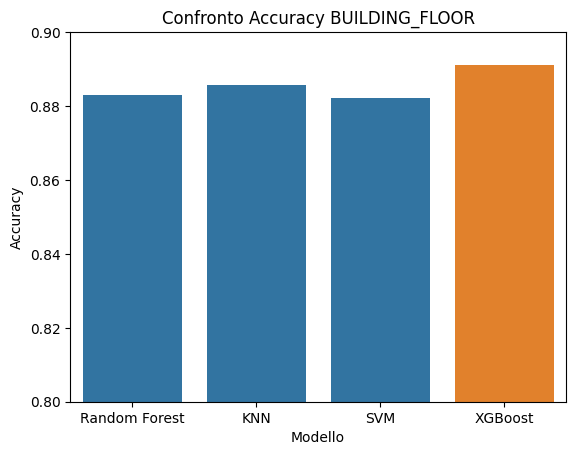

In [127]:
# trovo max accuracy
max_accuracy = max(range(4), key=lambda i: [accuracy_rf, accuracy_knn, accuracy_svm, accuracy_xgboost][i])

# coloro i grafici uguali tranne per max accuracy
colori_acc = [palette[0]] * 4
colori_acc[max_accuracy] = palette[-1]

# costruisco grafico
sns.barplot(x=colonne, y=[accuracy_rf, accuracy_knn, accuracy_svm, accuracy_xgboost], hue=colori_acc, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("Accuracy")
plt.title("Confronto Accuracy BUILDING_FLOOR")

# zoom sul range d'interesse
plt.ylim(0.80, 0.90)

plt.show()

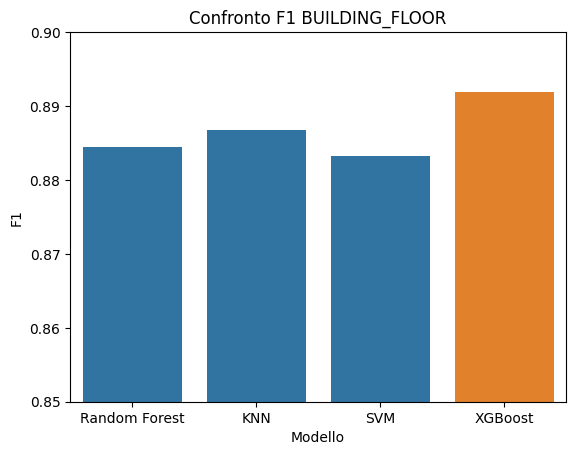

In [129]:
# Trovo max f1
max_f1 = max(range(4), key=lambda i: [f1_rf, f1_knn, f1_svm, f1_xgboost][i])

# Coloro i grafici uguali tranne per max f1
colori_f1 = [palette[0]] * 4
colori_f1[max_f1] = palette[-1]

# Costruisco grafico
sns.barplot(x=colonne, y=[f1_rf, f1_knn, f1_svm, f1_xgboost], hue=colori_f1, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("F1")
plt.title("Confronto F1 BUILDING_FLOOR")

# Zoom sul range d'interesse
plt.ylim(0.85, 0.90)

plt.show()

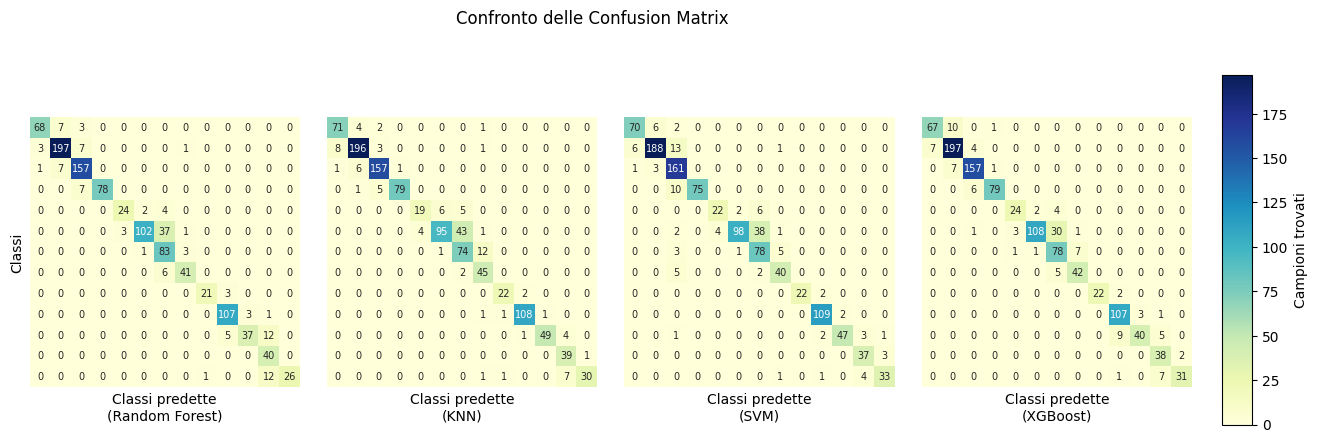

In [130]:
# Confusion Matrix

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plot each confusion matrix
for i, (ax, cm, title) in enumerate(zip(axes, [confusion_matrix_rf, confusion_matrix_knn, confusion_matrix_svm, confusion_matrix_xgboost],
                                       ["Random Forest", "KNN", "SVM", "XGBoost"])):
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap="YlGnBu", cbar=False, annot_kws={"size": 7})  # Imposta la dimensione del testo a 6
    ax.set_xlabel(f"Classi predette\n({title})")
    if i == 0:
        ax.set_ylabel("Classi")  # Aggiungi l'etichetta "Actual" solo nella prima matrice di confusione
    ax.set_aspect('equal')  # Imposta le dimensioni delle celle in modo che siano quadrate
    ax.set_xticks([])  # Rimuovi i ticks sull'asse x
    ax.set_yticks([])  # Rimuovi i ticks sull'asse y
    ax.set_xticklabels([])  # Rimuovi le etichette sull'asse x
    ax.set_yticklabels([])  # Rimuovi le etichette sull'asse y

# Create a colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Regola la posizione e le dimensioni della colorbar
cbar = fig.colorbar(axes[0].collections[0], cax=cbar_ax)  # Usa il primo axes per ottenere la barra dei colori
cbar.set_label('Campioni trovati')  # Etichetta della colorbar

# Set title
plt.suptitle("Confronto delle Confusion Matrix")

# Regola lo spazio tra i subplot
plt.subplots_adjust(wspace=0.1)

plt.show()

## LATITUDE

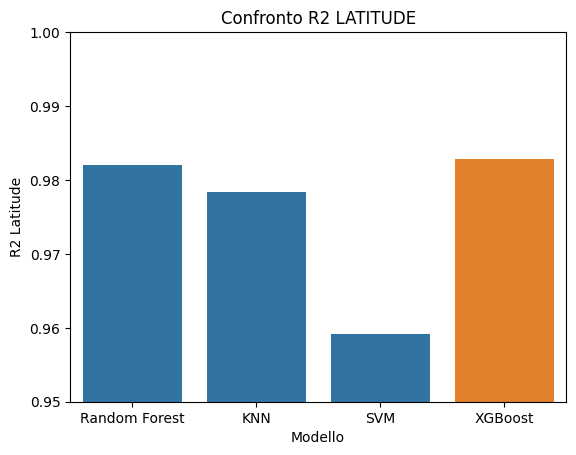

In [137]:
# Trovo max r2_latitude
max_r2_latitude = max(range(4), key=lambda i: [r2_latitude_rf, r2_latitude_knn, r2_latitude_svm, r2_latitude_xgboost][i])

# Coloro i grafici uguali tranne per max r2_latitude
colori_r2_latitude = [palette[0]] * 4
colori_r2_latitude[max_r2_latitude] = palette[-1]

# Costruisco grafico
sns.barplot(x=colonne, y=[r2_latitude_rf, r2_latitude_knn, r2_latitude_svm, r2_latitude_xgboost], hue=colori_r2_latitude, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("R2 Latitude")
plt.title("Confronto R2 LATITUDE")

# Zoom sul range d'interesse
plt.ylim(0.95, 1.00)

plt.show()

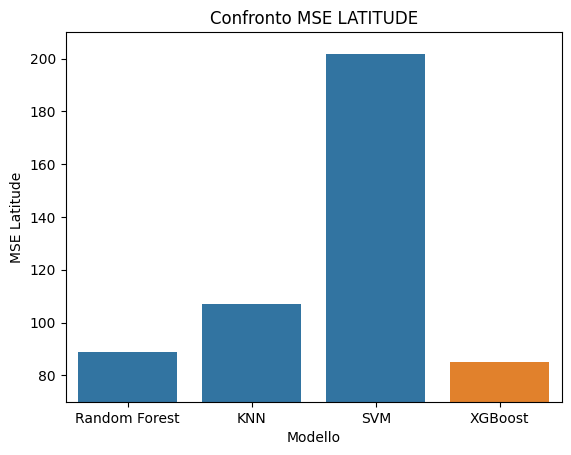

In [138]:
# Trovo min mse_latitude
min_mse_latitude = min(range(4), key=lambda i: [mse_latitude_rf, mse_latitude_knn, mse_latitude_svm, mse_latitude_xgboost][i])

# Coloro i grafici uguali tranne per min mse_latitude
colori_mse_latitude = [palette[0]] * 4
colori_mse_latitude[min_mse_latitude] = palette[-1]

# Costruisco grafico
sns.barplot(x=colonne, y=[mse_latitude_rf, mse_latitude_knn, mse_latitude_svm, mse_latitude_xgboost], hue=colori_mse_latitude, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("MSE Latitude")
plt.title("Confronto MSE LATITUDE")

# Zoom sul range d'interesse
plt.ylim(70, 210)

plt.show()

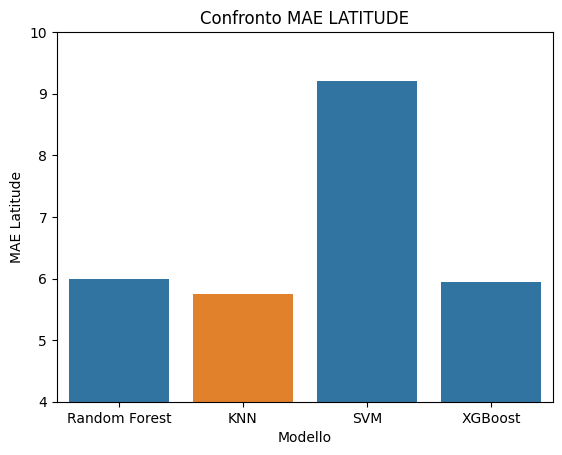

In [139]:
# Trovo min mae_latitude
min_mae_latitude = min(range(4), key=lambda i: [mae_latitude_rf, mae_latitude_knn, mae_latitude_svm, mae_latitude_xgboost][i])

# Coloro i grafici uguali tranne per min mae_latitude
colori_mae_latitude = [palette[0]] * 4
colori_mae_latitude[min_mae_latitude] = palette[-1]

# Costruisco grafico
sns.barplot(x=colonne, y=[mae_latitude_rf, mae_latitude_knn, mae_latitude_svm, mae_latitude_xgboost], hue=colori_mae_latitude, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("MAE Latitude")
plt.title("Confronto MAE LATITUDE")

# Zoom sul range d'interesse
plt.ylim(4, 10)

plt.show()

## LONGITUDE

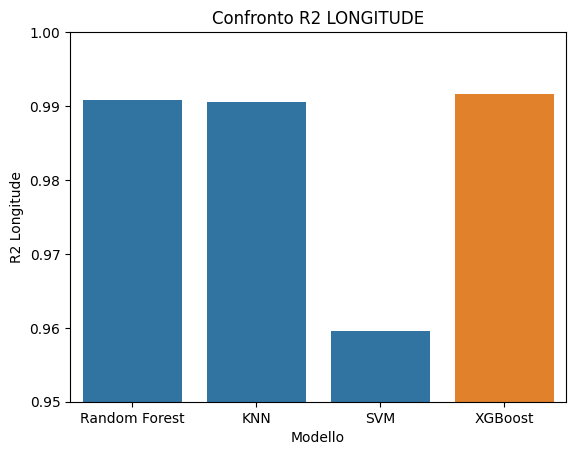

In [140]:
# Trovo max r2_longitude
max_r2_longitude = max(range(4), key=lambda i: [r2_longitude_rf, r2_longitude_knn, r2_longitude_svm, r2_longitude_xgboost][i])

# Coloro i grafici uguali tranne per max r2_longitude
colori_r2_longitude = [palette[0]] * 4
colori_r2_longitude[max_r2_longitude] = palette[-1]

# Costruisco grafico
sns.barplot(x=colonne, y=[r2_longitude_rf, r2_longitude_knn, r2_longitude_svm, r2_longitude_xgboost], hue=colori_r2_longitude, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("R2 Longitude")
plt.title("Confronto R2 LONGITUDE")

# Zoom sul range d'interesse
plt.ylim(0.95, 1.00)

plt.show()

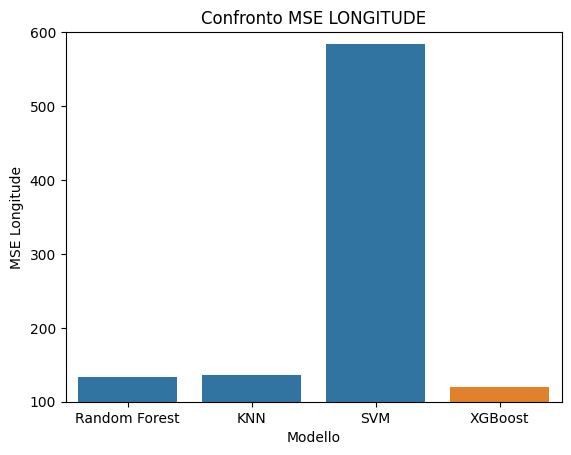

In [142]:
# Trovo min mse_longitude
min_mse_longitude = min(range(4), key=lambda i: [mse_longitude_rf, mse_longitude_knn, mse_longitude_svm, mse_longitude_xgboost][i])

# Coloro i grafici uguali tranne per min mse_longitude
colori_mse_longitude = [palette[0]] * 4
colori_mse_longitude[min_mse_longitude] = palette[-1]

# Costruisco grafico
sns.barplot(x=colonne, y=[mse_longitude_rf, mse_longitude_knn, mse_longitude_svm, mse_longitude_xgboost], hue=colori_mse_longitude, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("MSE Longitude")
plt.title("Confronto MSE LONGITUDE")

# Zoom sul range d'interesse
plt.ylim(100, 600)

plt.show()

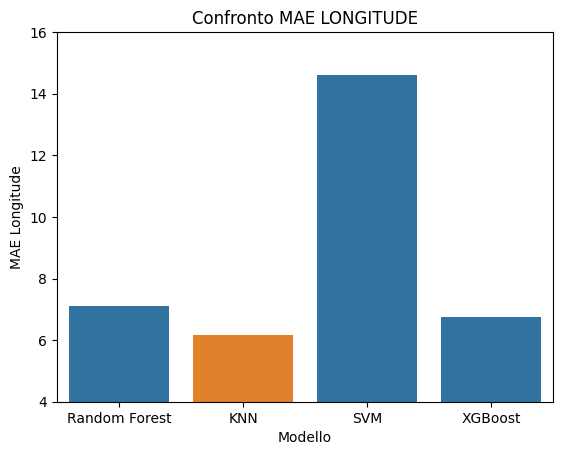

In [143]:
# Trovo min mae_longitude
min_mae_longitude = min(range(4), key=lambda i: [mae_longitude_rf, mae_longitude_knn, mae_longitude_svm, mae_longitude_xgboost][i])

# Coloro i grafici uguali tranne per min mae_longitude
colori_mae_longitude = [palette[0]] * 4
colori_mae_longitude[min_mae_longitude] = palette[-1]

# Costruisco grafico
sns.barplot(x=colonne, y=[mae_longitude_rf, mae_longitude_knn, mae_longitude_svm, mae_longitude_xgboost], hue=colori_mae_longitude, dodge=False, legend=False)
plt.xlabel("Modello")
plt.ylabel("MAE Longitude")
plt.title("Confronto MAE LONGITUDE")

# Zoom sul range d'interesse
plt.ylim(4, 16)

plt.show()